In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('bread_production_data.csv')
df.info()
print(df.isna().sum())
display(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fermentation_temp      47507 non-null  float64
 1   fermentation_humidity  47522 non-null  float64
 2   kneading_time          47622 non-null  float64
 3   baking_temp            47569 non-null  float64
 4   baking_time            47717 non-null  float64
 5   conveyor_speed         47690 non-null  float64
 6   bread_weight           43341 non-null  float64
 7   bread_volume           42839 non-null  float64
 8   crust_color            45395 non-null  float64
dtypes: float64(9)
memory usage: 3.4 MB
fermentation_temp        2493
fermentation_humidity    2478
kneading_time            2378
baking_temp              2431
baking_time              2283
conveyor_speed           2310
bread_weight             6659
bread_volume             7161
crust_color              4605
dtype: int

fermentation_temp  fermentation_humidity  kneading_time  baking_temp  \
39106          21.241875              53.118307      18.687430   244.145897   
8203           25.852486              65.526876      17.383929          NaN   
33292          22.870836              53.646341      18.636806   174.194438   
39295          22.704749              61.807676      13.748531   179.629368   
31840          24.623815              59.700003      13.597477   229.943791   
5886           20.987946              51.085451      16.006498   199.758701   
35447          23.246085              59.955608      18.979037   209.569073   
49790          33.217830                    NaN      17.700507   186.684698   
23696          26.642522              52.852936      16.735136   251.214791   
6024           26.725914              52.921529      18.268971   190.559047   

       baking_time  conveyor_speed  bread_weight  bread_volume  crust_color  
39106    27.983820        1.533141    463.146016    969.503595    17.337935  
8203     19.190153        1.581925           NaN           NaN          NaN  
33292    17.061977        2.423569    462.047565   1033.201714    14.704573  
39295    23.556777        1.554929    487.749248   1036.064125    14.530986  
31840    27.707256        1.356721    474.406503   1108.312050    17.345337  
5886     28.703277        1.635091    482.657791   1047.758773    16.061087  
35447    29.119189        1.345569    454.695144   1059.440857    15.764989  
49790    27.724424        1.684678    466.989167           NaN    14.833683  
23696    27.108970        2.199181    467.928459   1047.070868    18.430063  
6024     24.145701        1.692377    481.150045   1013.470141    15.444373

In [3]:
def high_light_var(ax_,variable_index):
  # Iterate through the axes and color the desired variable
  for i in range(len(df_number.columns)):
    for j in range(len(df_number.columns)):
      if i != j:  # Skip diagonal plots
        if i == variable_index or j == variable_index:
          # Color the scatter plots involving your variable
          ax_[i, j].get_children()[0].set_color('red')

number_columns = list(df.select_dtypes(include=['float64','int64']).columns)

df_number = df[number_columns].copy()

for col in number_columns:
  if df_number[col].isna().sum() > 0:
    df_number['miss'] = df_number[col].apply(lambda x: -1 if np.isnan(x) else x)
    ax = pd.plotting.scatter_matrix(df_number,diagonal='kde',figsize=(15,15))
    variable_index = df_number.columns.get_loc('miss')
    high_light_var(ax,variable_index)
    plt.suptitle(col.upper(),y=0.9)


Output hidden; open in https://colab.research.google.com to view.

fermentation_temp        0
fermentation_humidity    0
kneading_time            0
baking_temp              0
baking_time              0
conveyor_speed           0
bread_weight             0
bread_volume             0
crust_color              0
dtype: int64

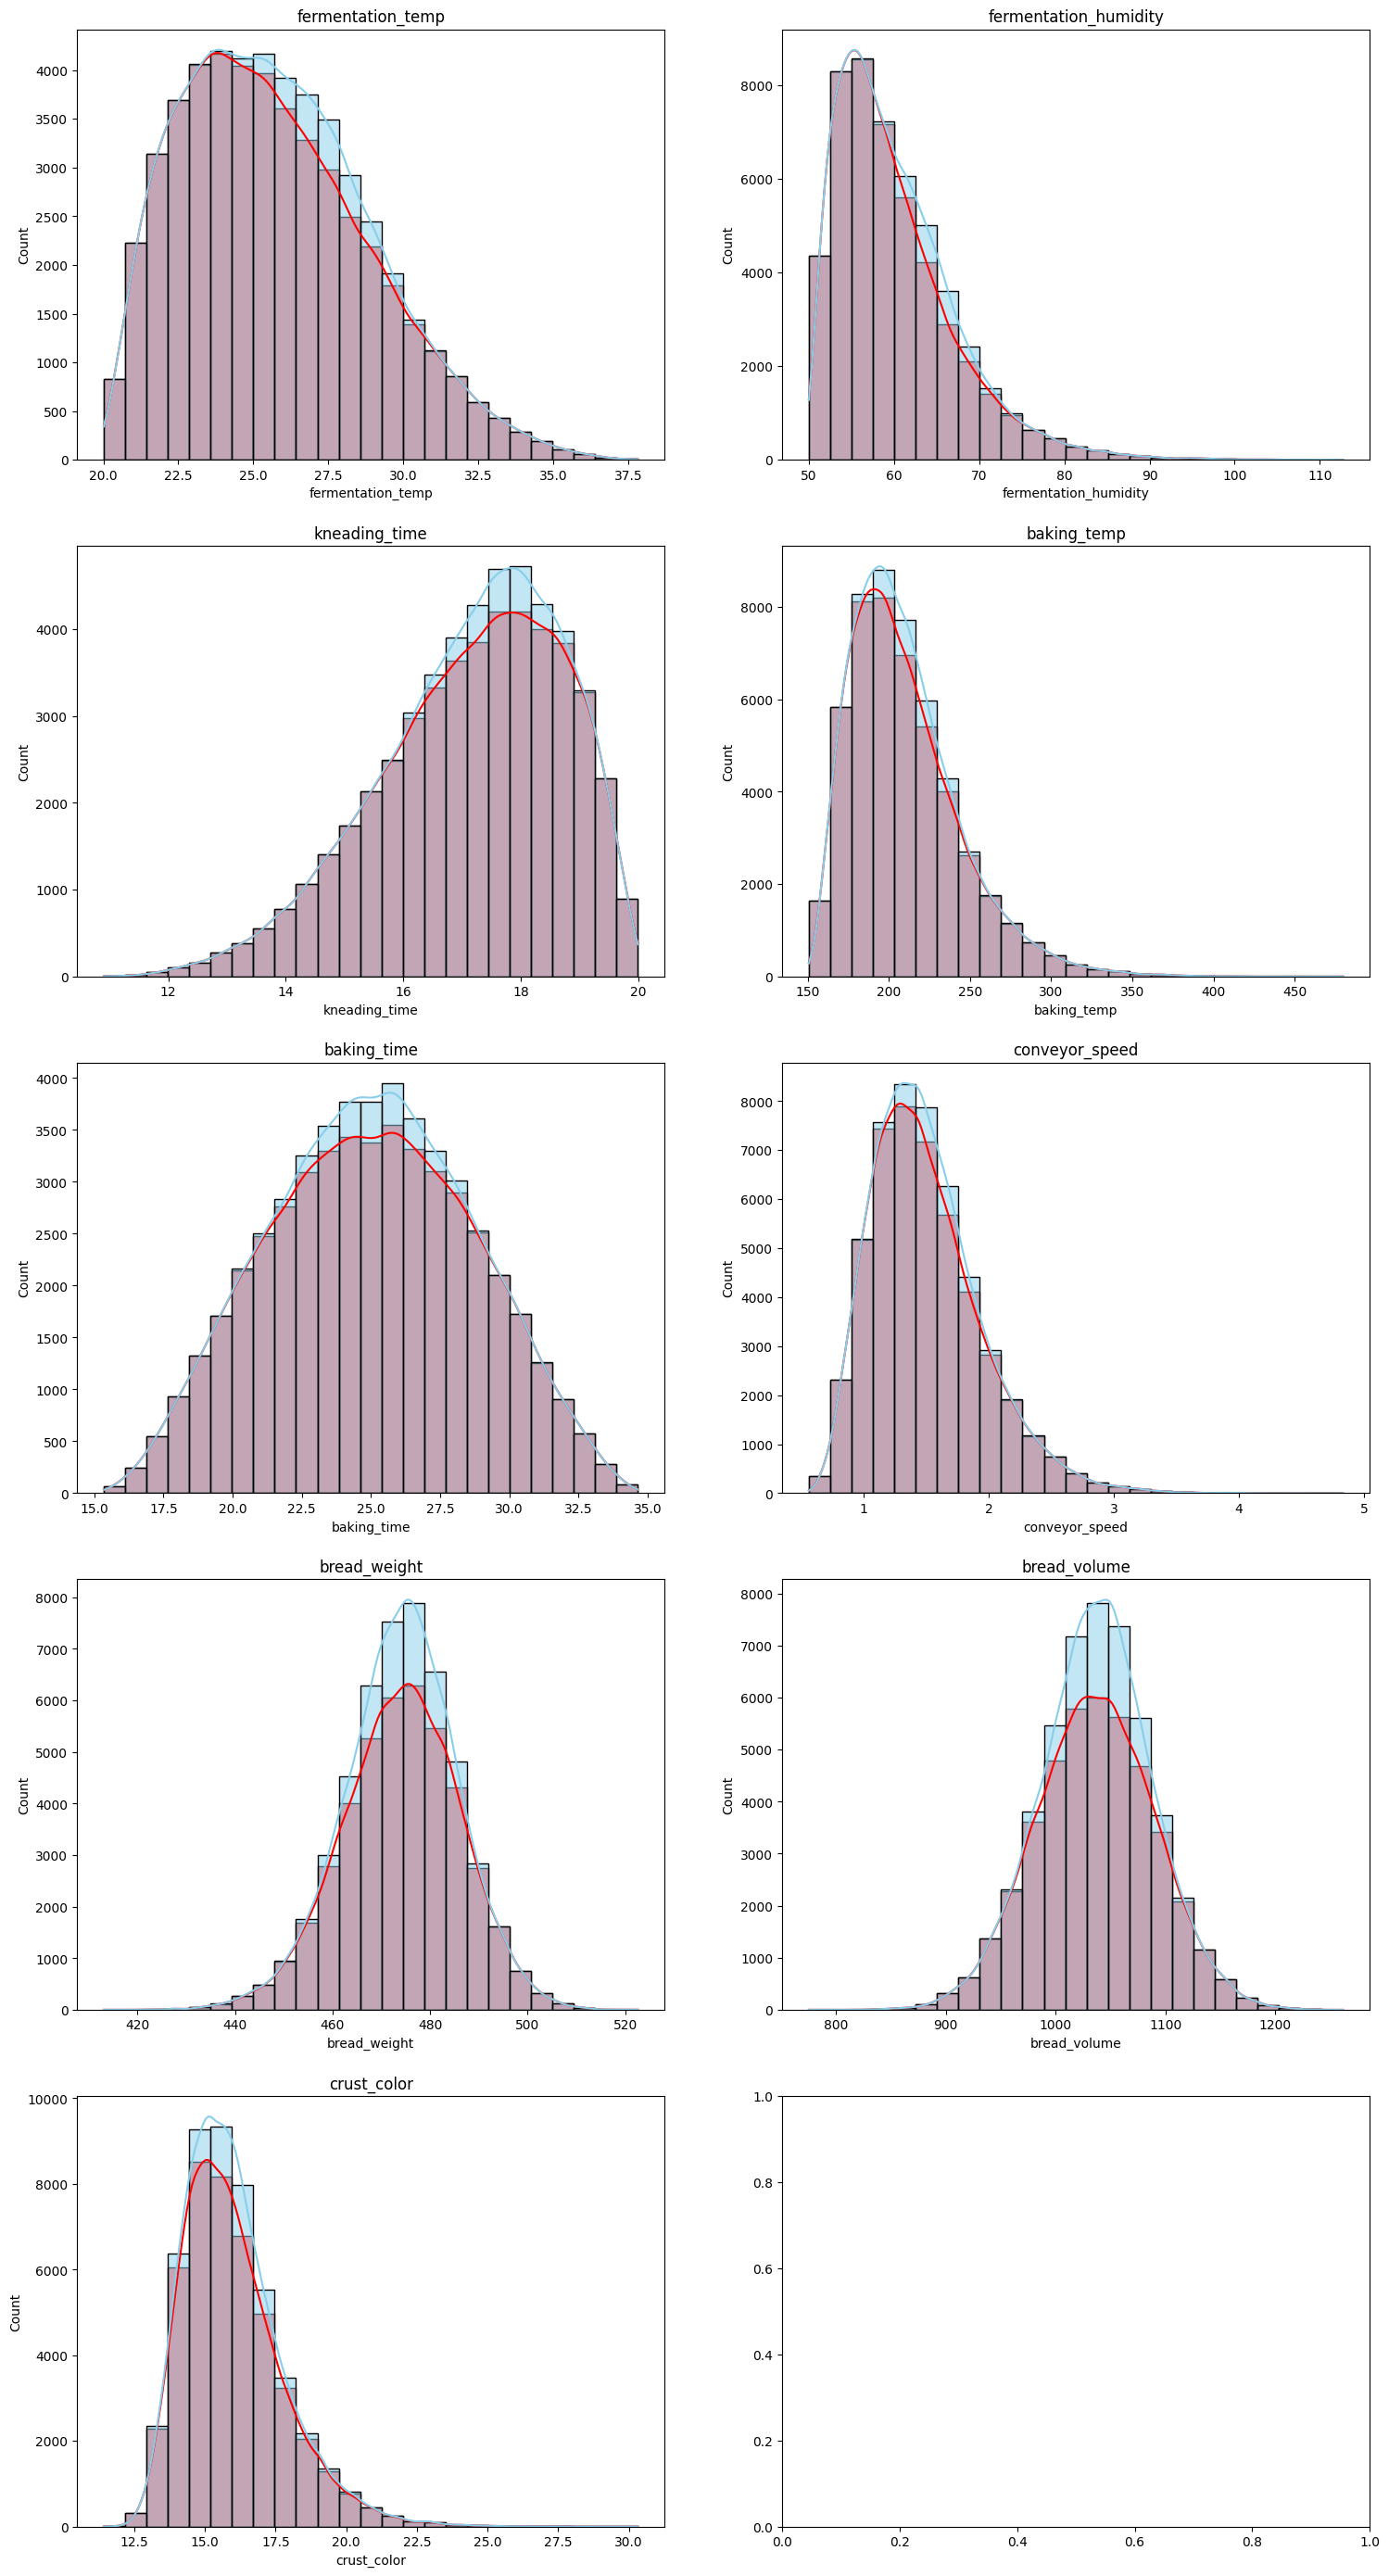

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
df_imputed = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
display(df_imputed.isna().sum())

fig,axes = plt.subplots(5,2,figsize=(18,35))
axes=axes.flatten()

for idx,col in enumerate(df_imputed.columns):
  ax = axes[idx]
  sns.histplot(df[col],kde=True,color='red',alpha=0.5,ax=ax,bins=25)
  sns.histplot(df_imputed[col],kde=True,color='skyblue',alpha=0.5,bins=25,ax=ax)
  ax.set_title(col)

plt.show()

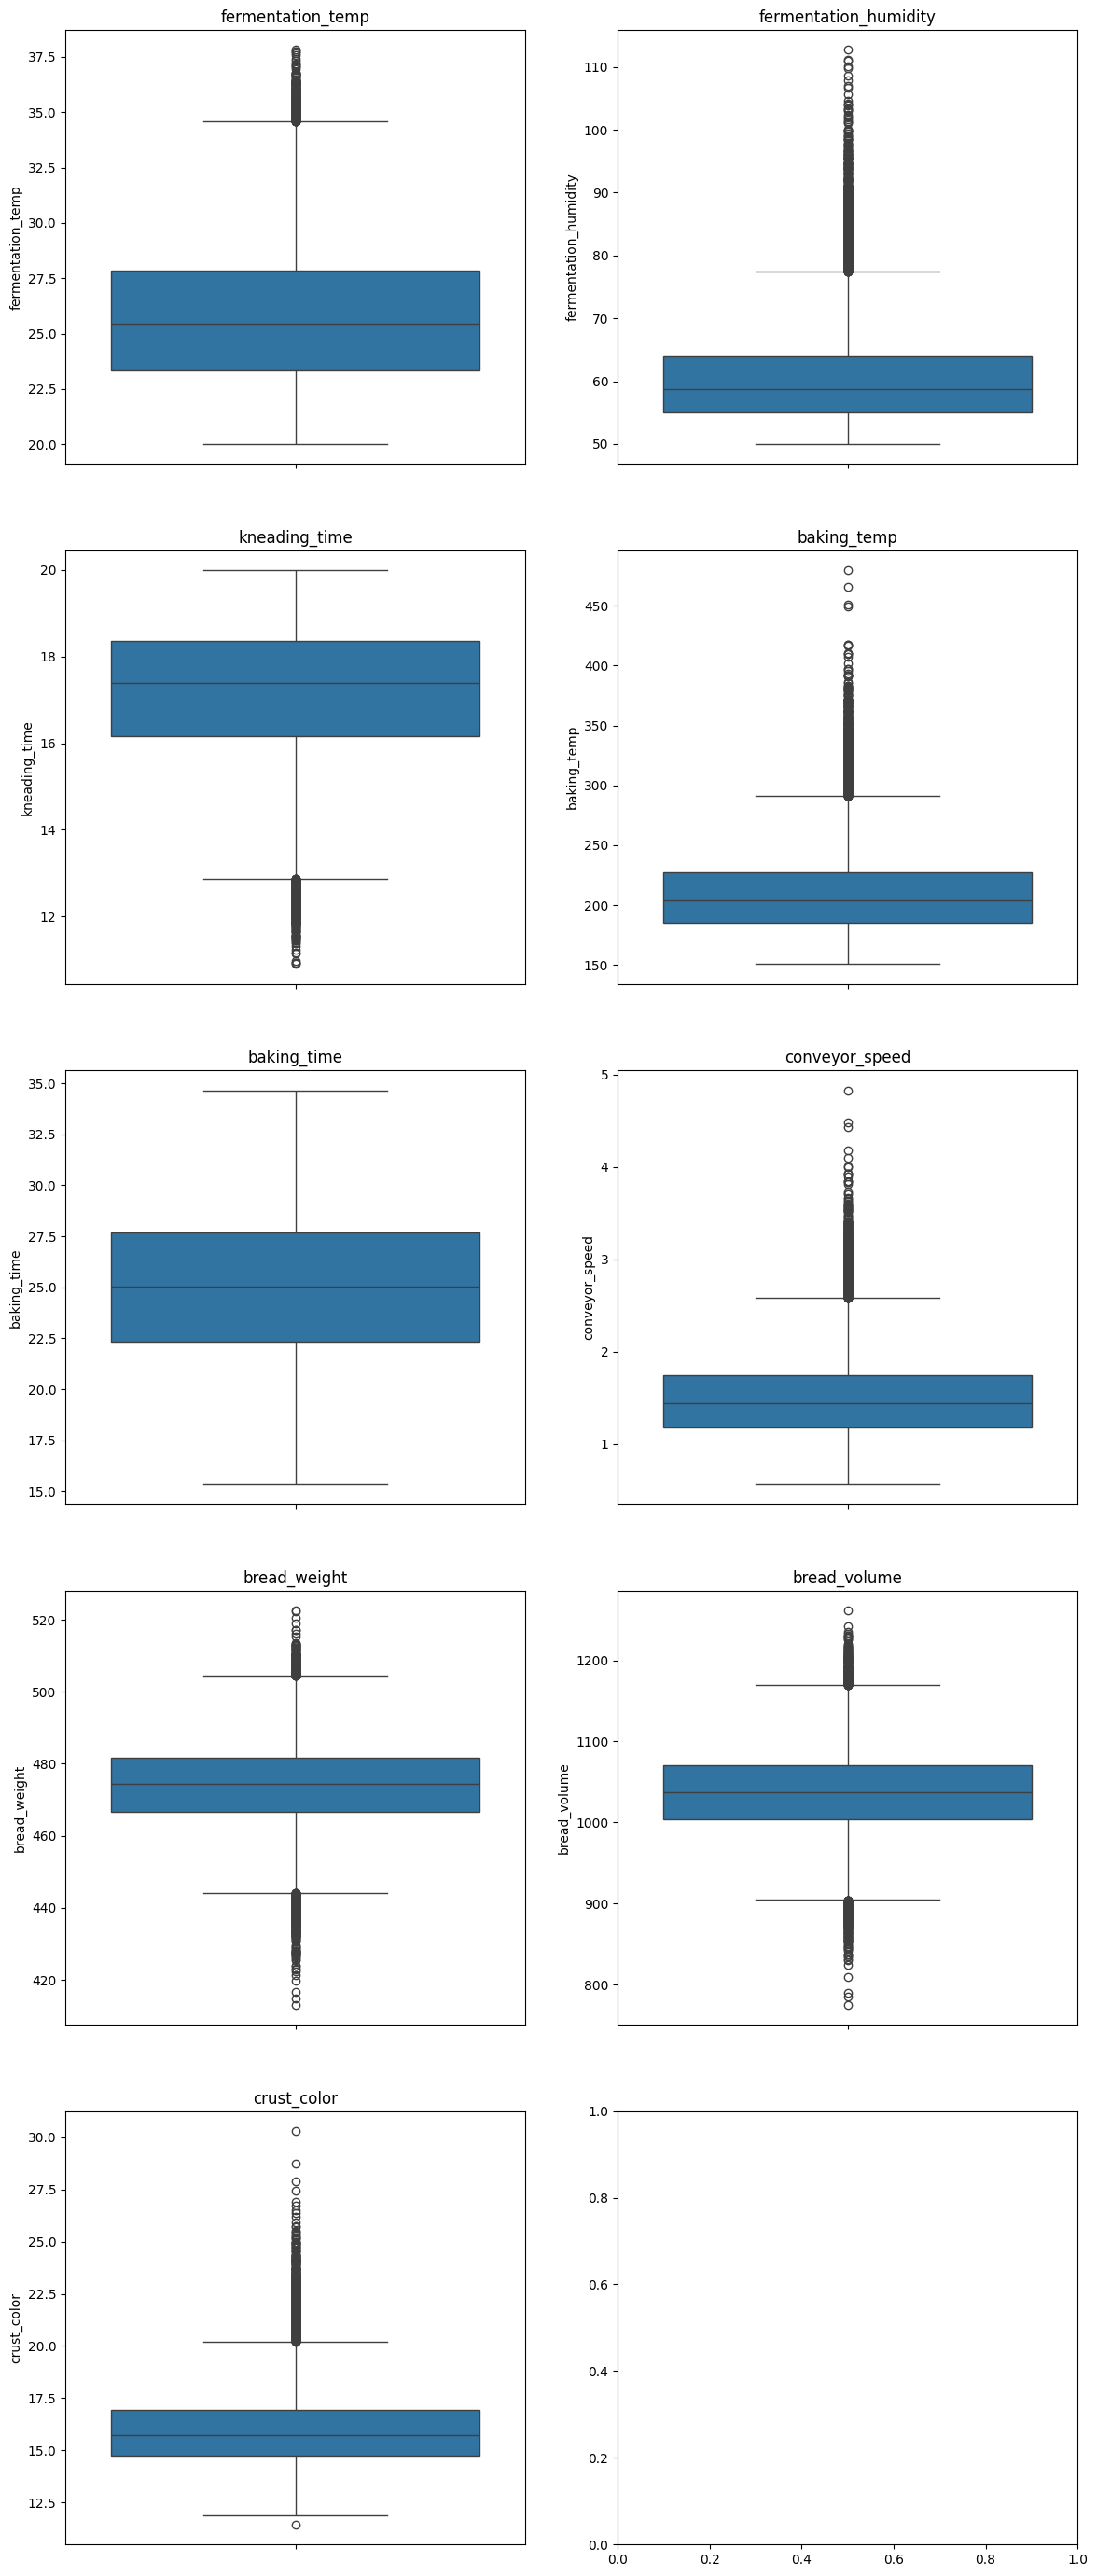

In [7]:
df = df_imputed.copy()

fig,axes = plt.subplots(5,2,figsize=(14,35))
axes = axes.flatten()

for idx,col in enumerate(df.columns):
  ax = axes[idx]
  sns.boxplot(y=df[col],ax=ax)
  ax.set_title(col)

plt.show()

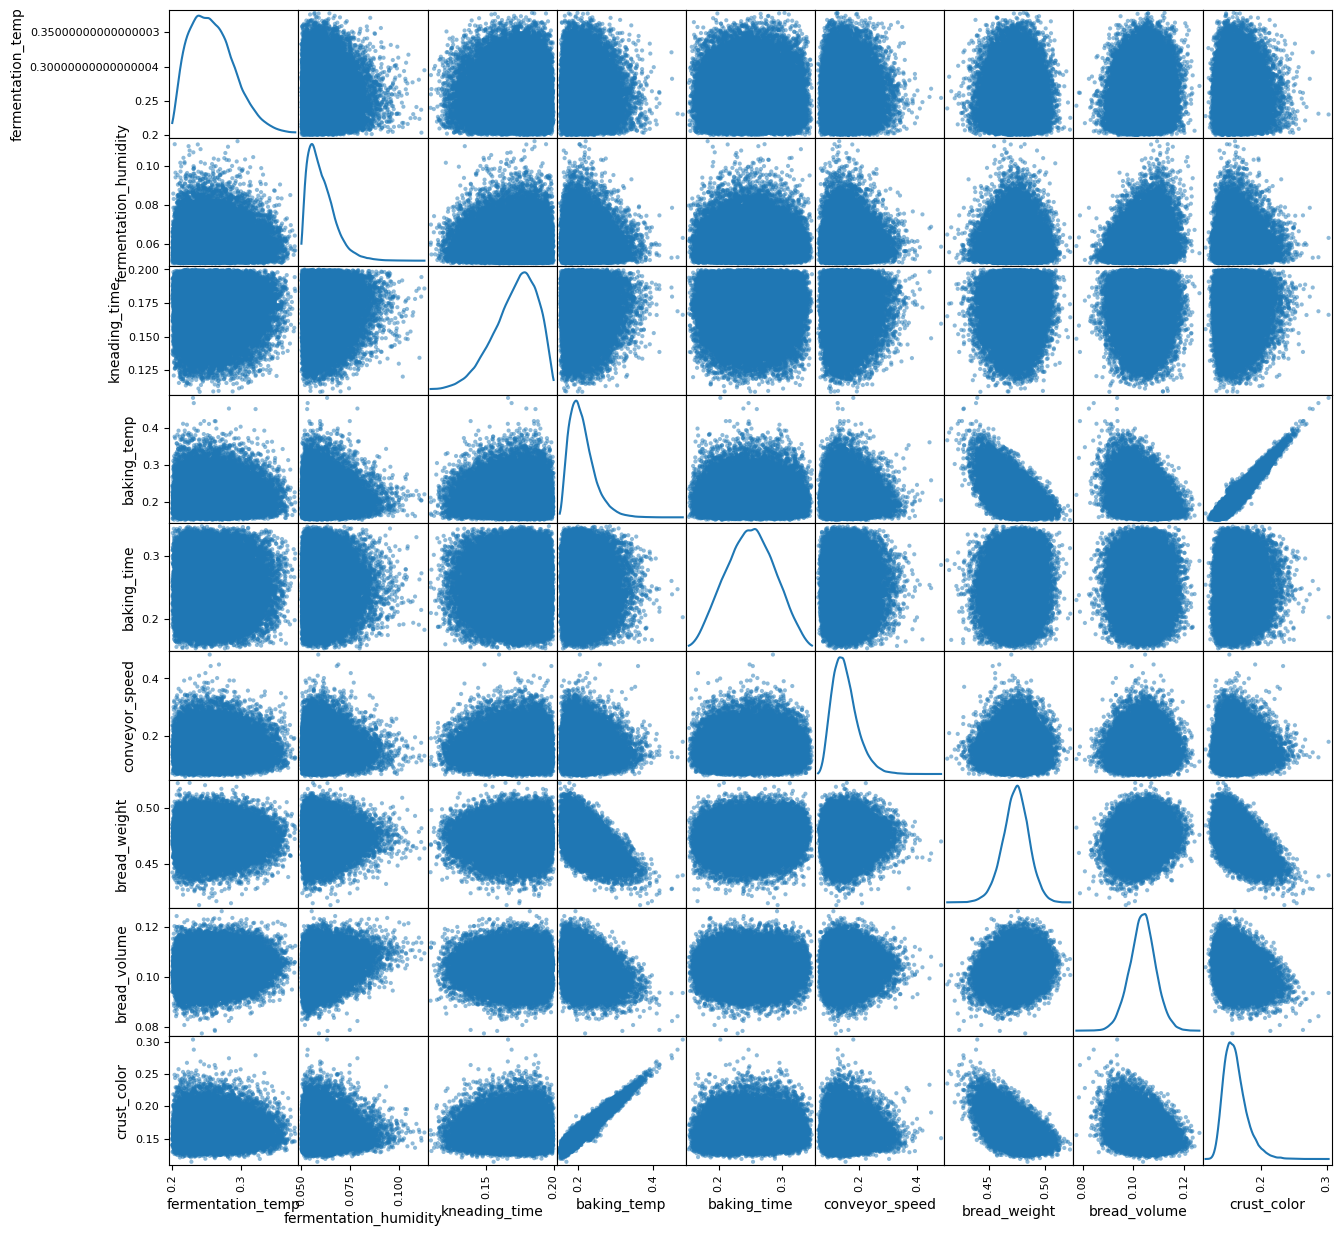

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np

# Z-Score
scaler = StandardScaler()
df_ZScaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)

# min-max scaling
scaler = MinMaxScaler()
df_MMScaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)

# Roburst Scaling
scaler = RobustScaler()
df_RBScaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)

# Decimal Scaling
df_DECScaled = df / 10**np.ceil(np.log10(df.abs().max()))

ax = pd.plotting.scatter_matrix(df_DECScaled,diagonal='kde',figsize=(15,15))
plt.show()


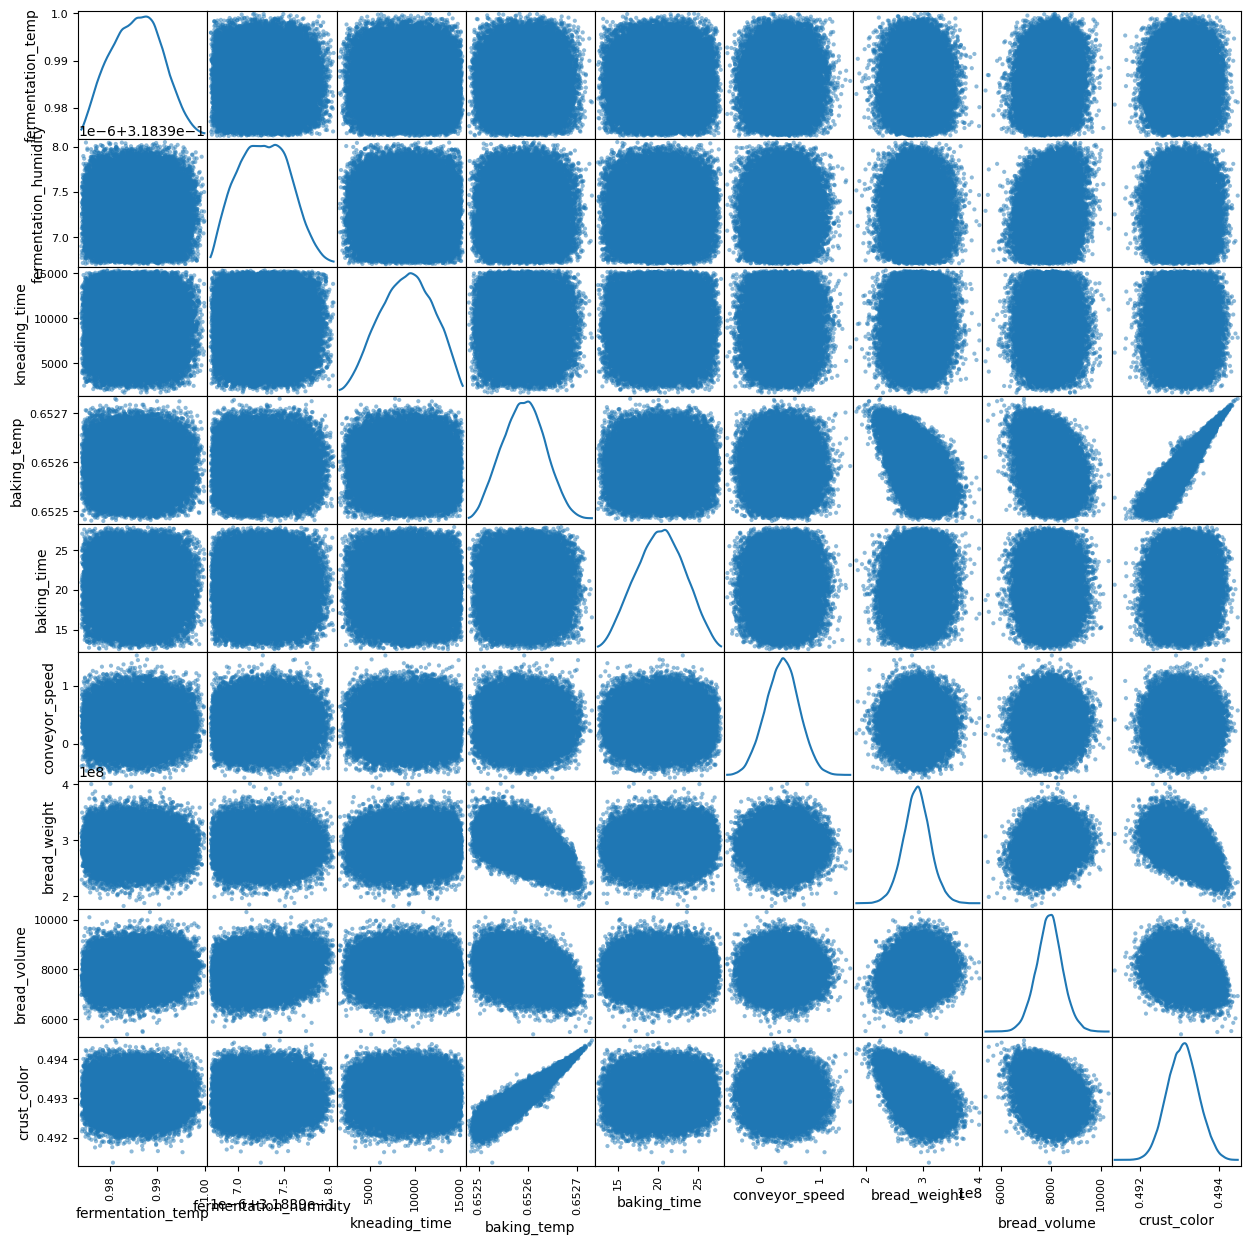

In [10]:
from scipy import stats

df_trans = df.copy()
for col in df_trans.columns:
  df_trans[col],lambda_param = stats.boxcox(df_trans[col])

ax = pd.plotting.scatter_matrix(df_trans,diagonal='kde',figsize=(15,15))

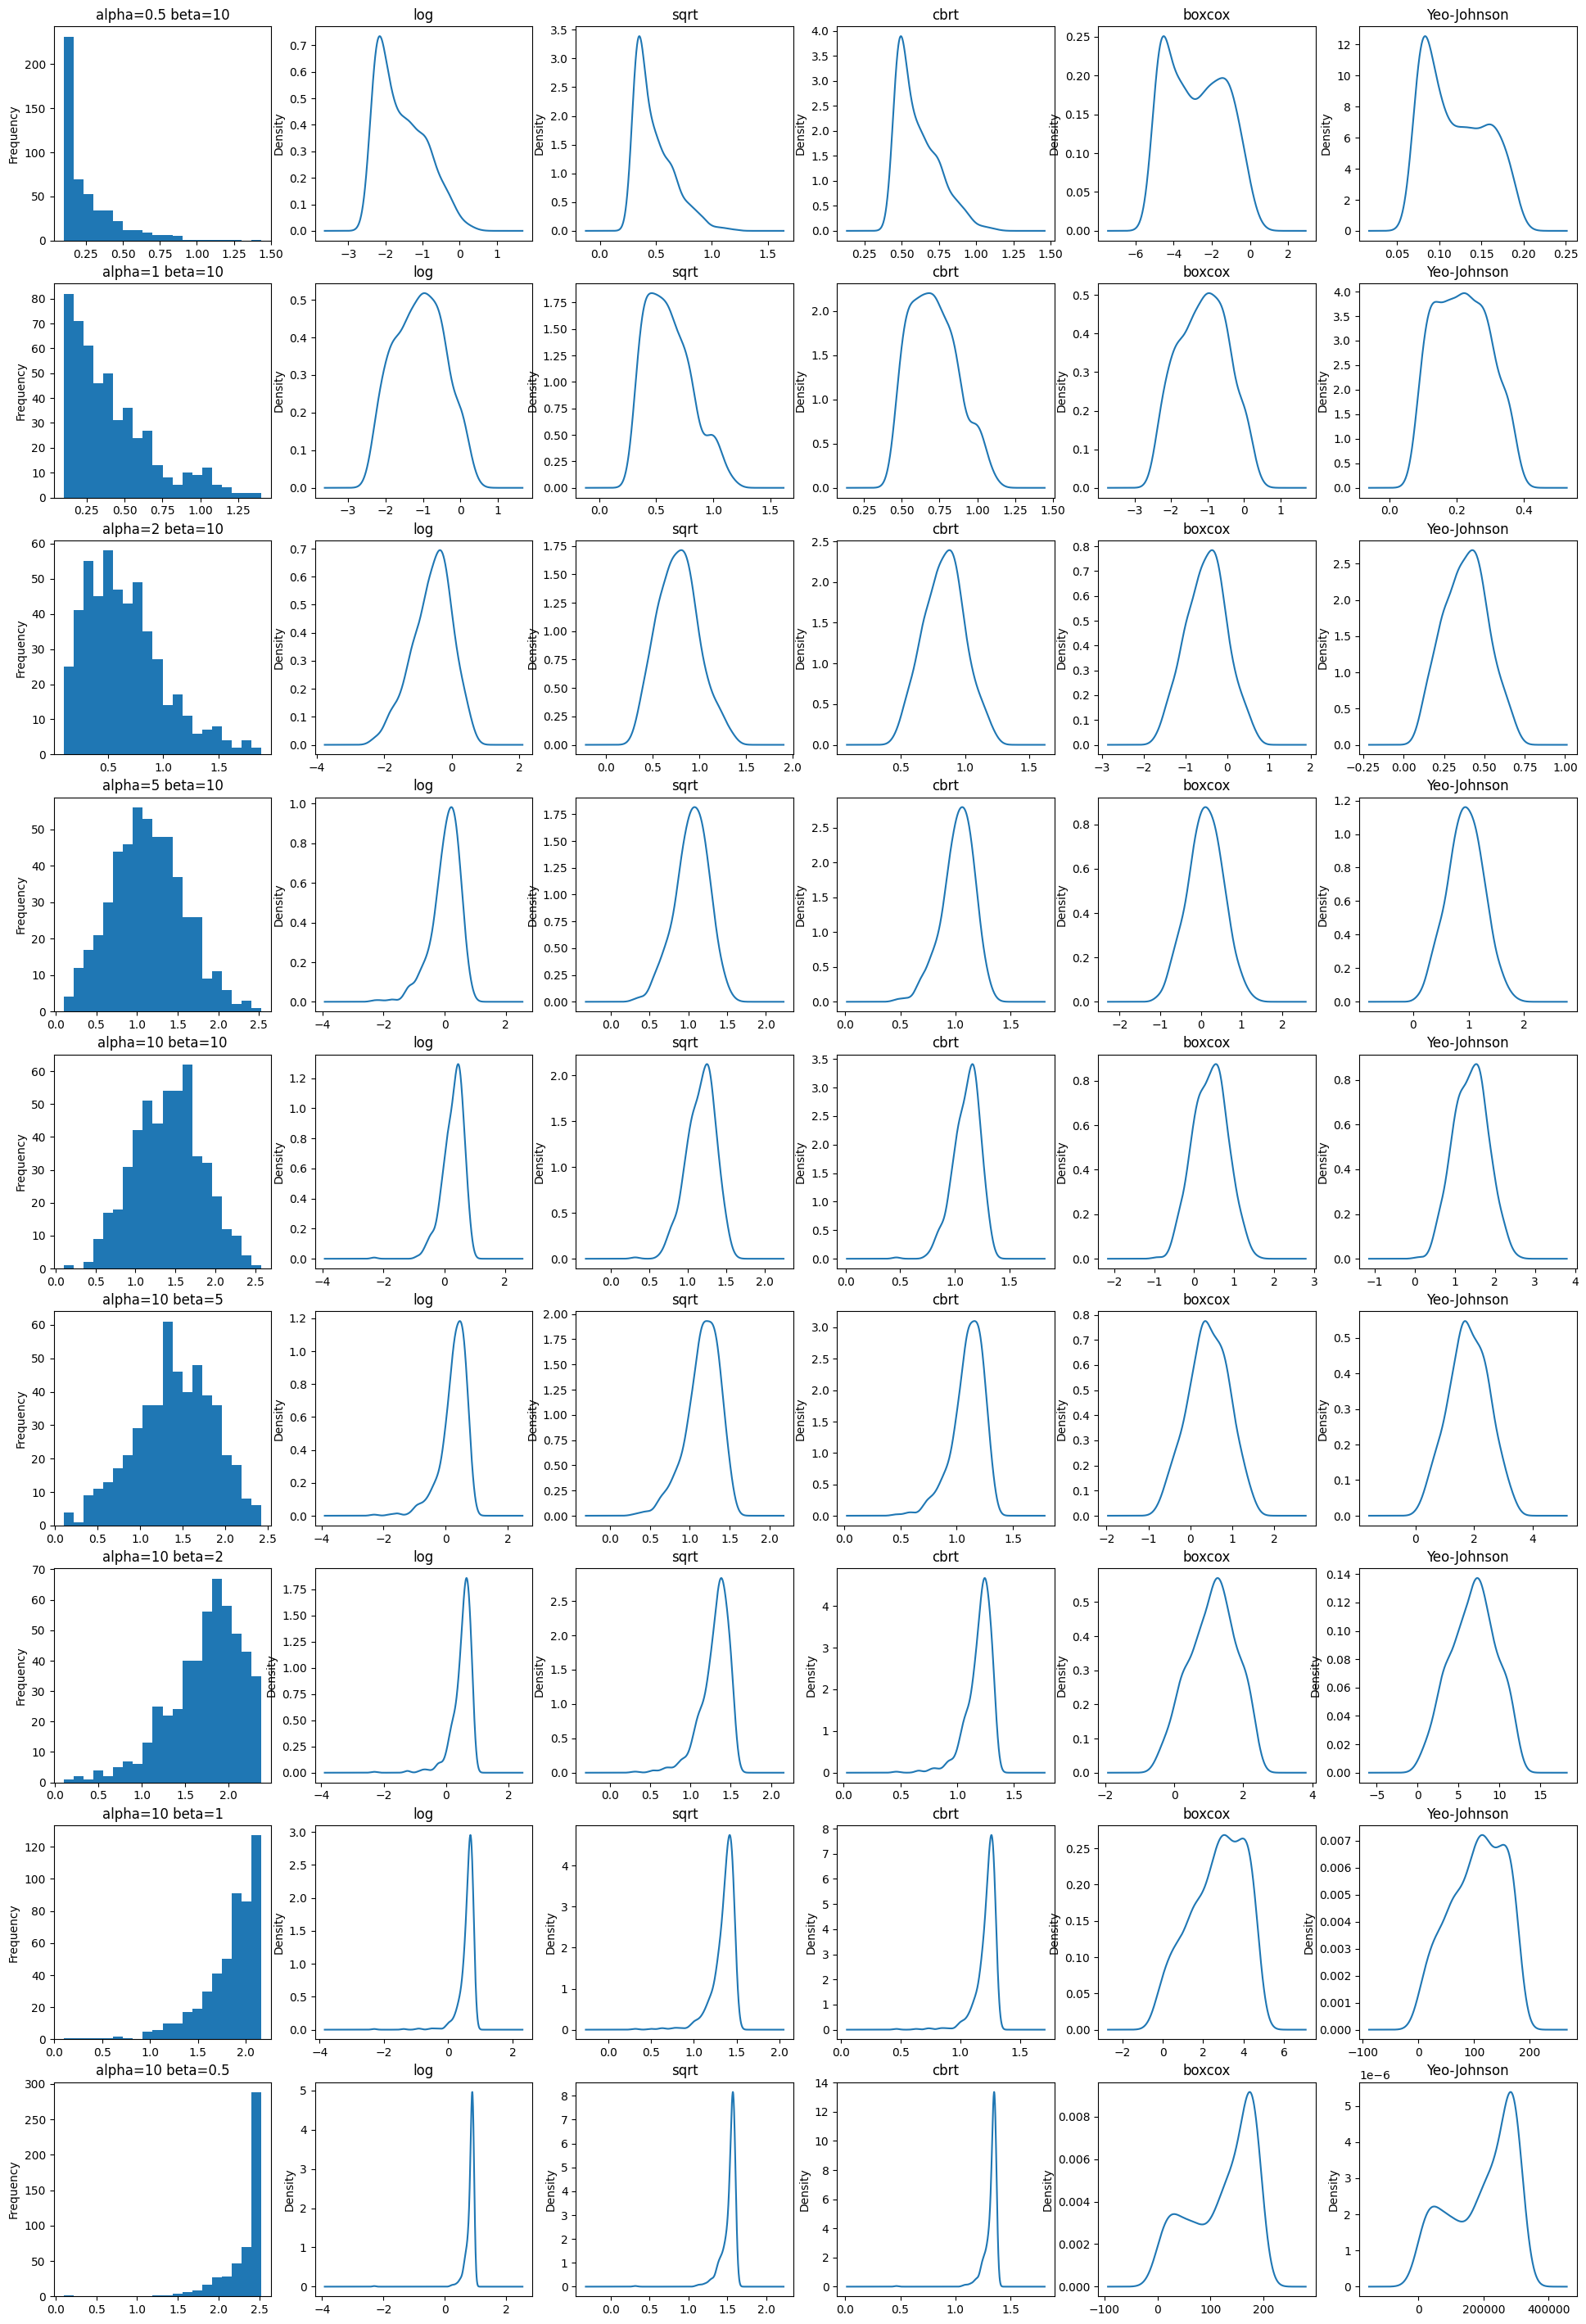

In [16]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson

config = [(0.5,10),(1,10),(2,10),(5,10),(10,10),(10,5),(10,2),(10,1),(10,0.5)]
fig,axes = plt.subplots(len(config),6,figsize=(24,4*len(config)))

i = 0
j = 0
for a,b in config:
  betaData = np.random.beta(a,b,size=500)

# zero and negative data problem
  # max_value = np.max(betaData)
  # betaData = (betaData * (max_value + 3) - 3)
  ## solution
  # betaData = betaData + abs(np.min(betaData)) + 0.1
# zero and negative data problem

  pd.Series(betaData).plot.hist(bins=20,ax=axes[i,j])
  axes[i,j].set_title(f'alpha={a} beta={b}')
  j += 1

  pd.Series(np.log(betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('log')
  j += 1

  pd.Series(np.sqrt(betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('sqrt')
  j += 1

  pd.Series(np.cbrt(betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('cbrt')
  j += 1

  pd.Series(boxcox(betaData)[0]).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('boxcox')
  j += 1

  pd.Series(yeojohnson(betaData)[0]).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('Yeo-Johnson')

  if j == 5:
    i += 1
    j = 0
plt.show()


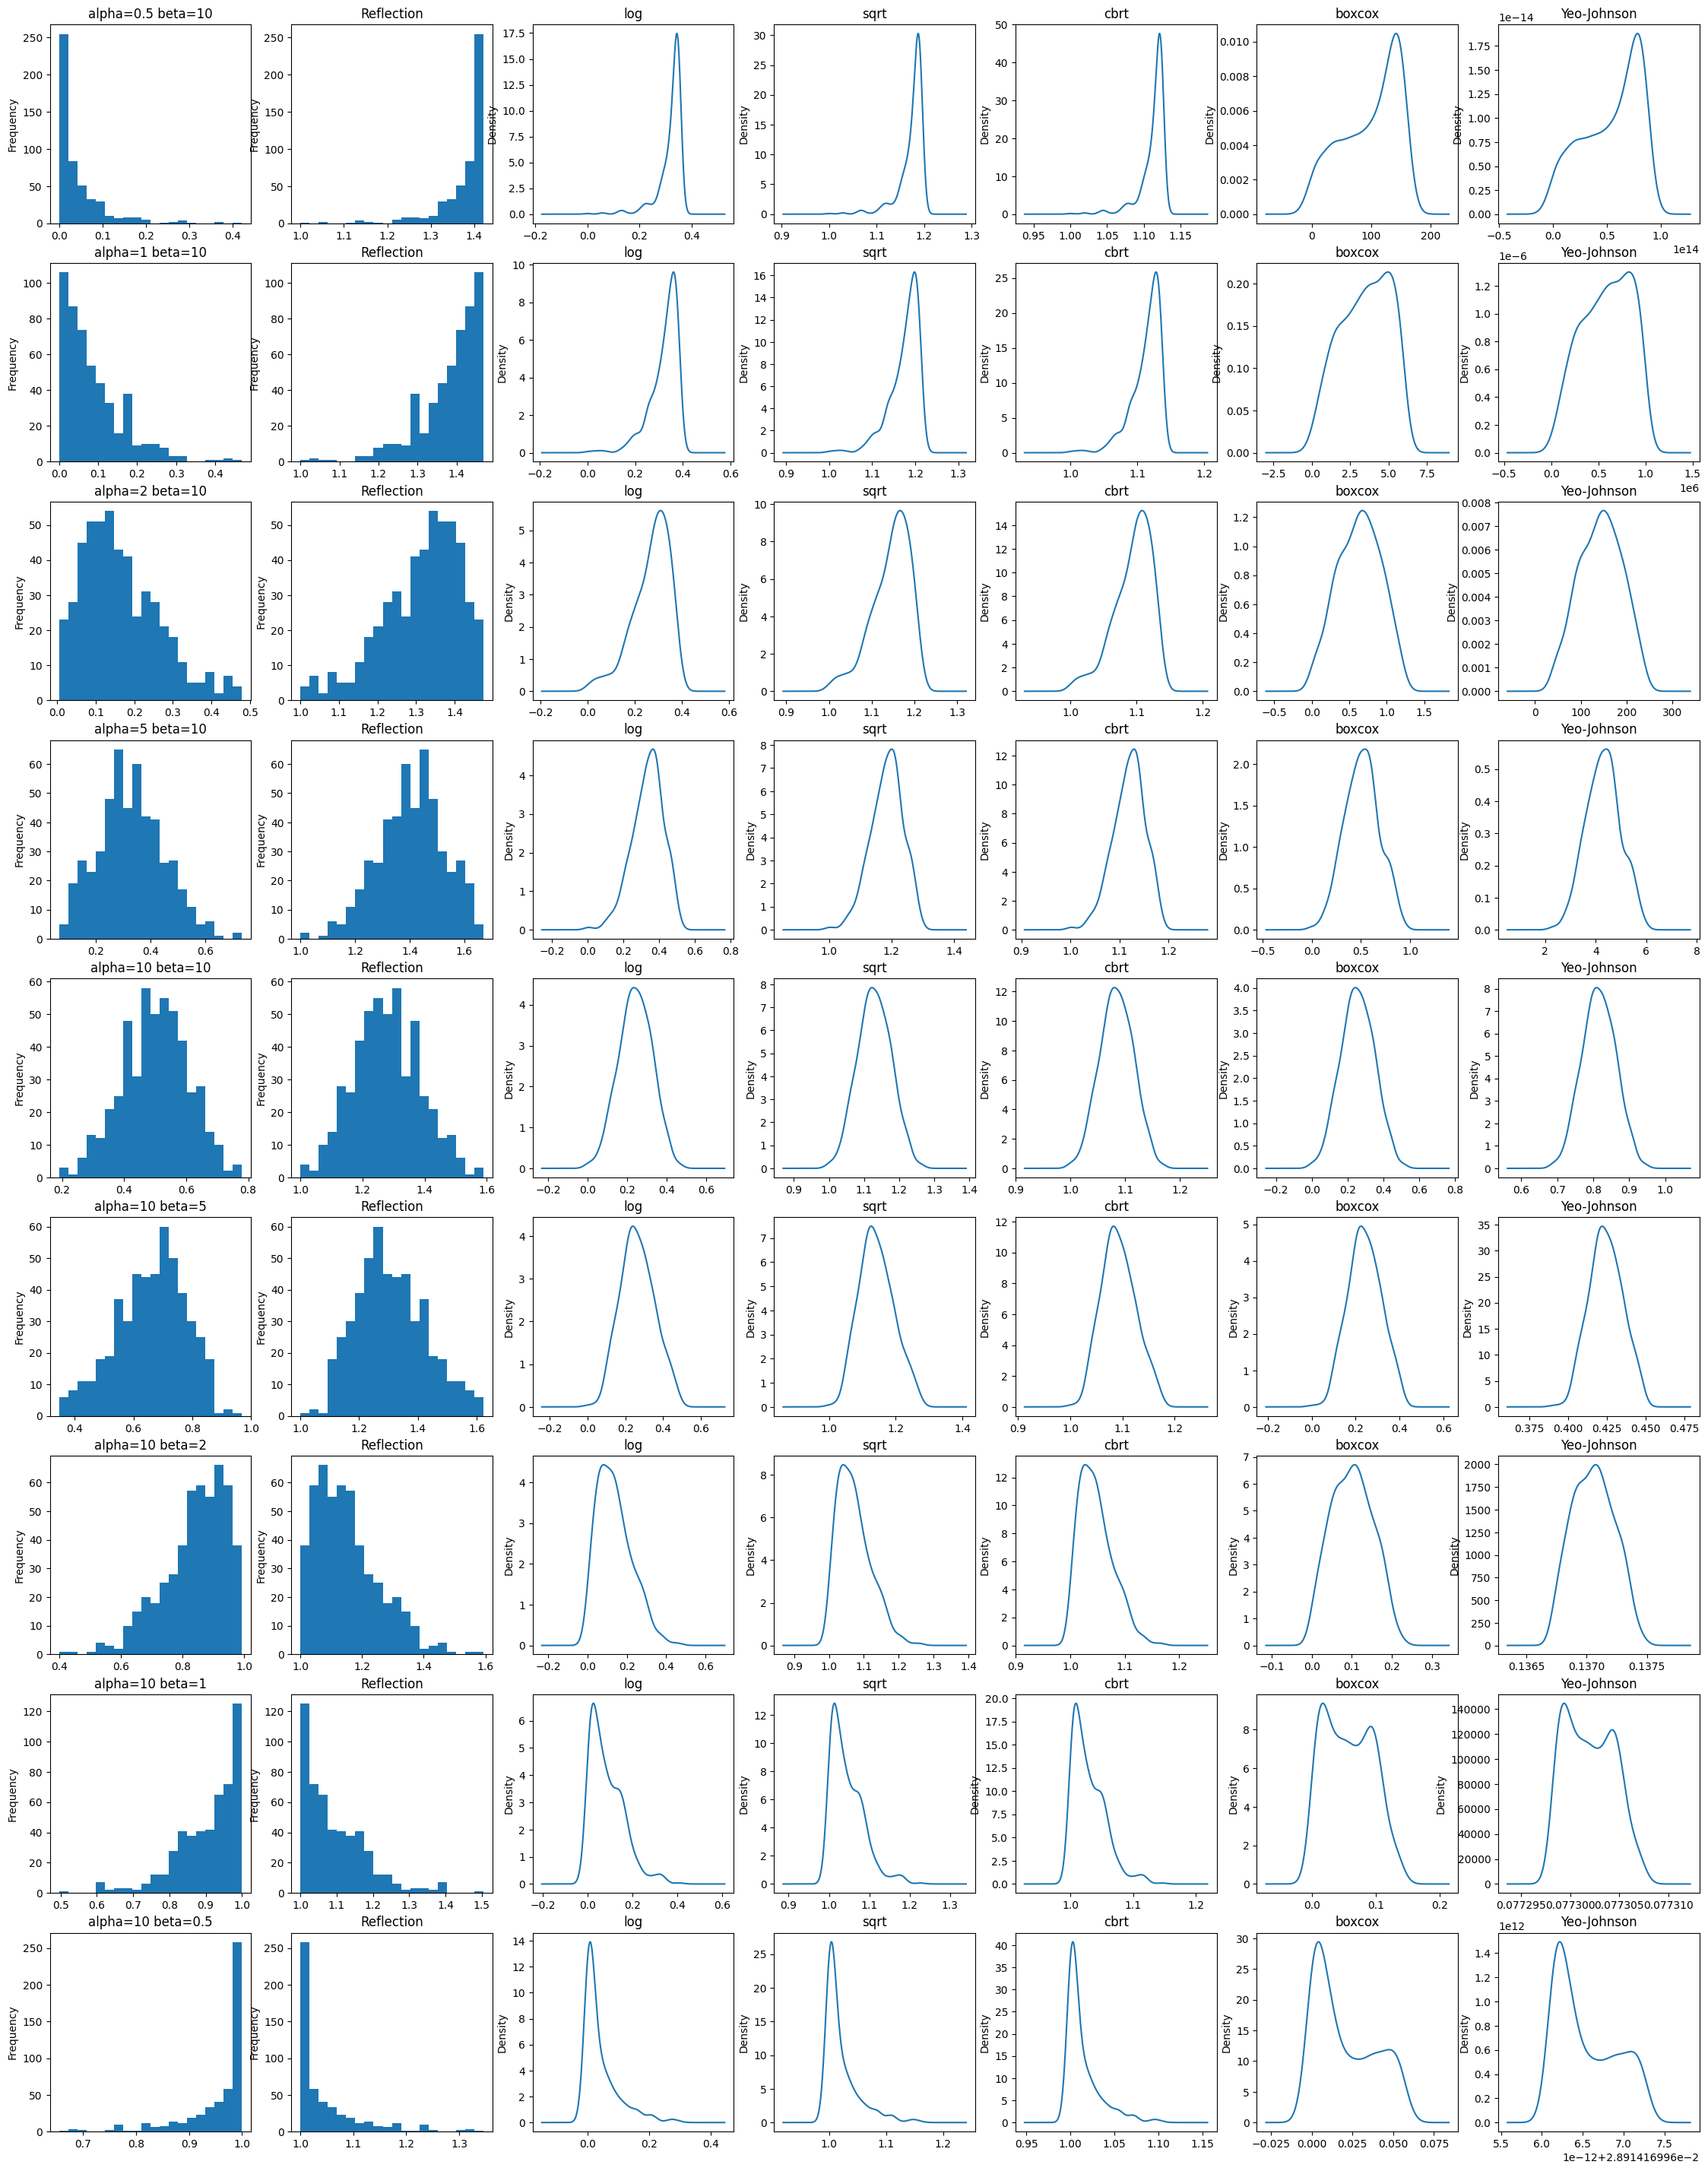

In [17]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson

def reflect(data):
  max_value = np.max(data)
  central_value = max_value + 1
  return central_value - data

config = [(0.5,10),(1,10),(2,10),(5,10),(10,10),(10,5),(10,2),(10,1),(10,0.5)]
fig,axes = plt.subplots(len(config),7,figsize=(28,4*len(config)))

i = 0
j = 0
for a,b in config:
  betaData = np.random.beta(a,b,size=500)

  pd.Series(betaData).plot.hist(bins=20,ax=axes[i,j])
  axes[i,j].set_title(f'alpha={a} beta={b}')
  j += 1

  betaData = reflect(betaData)

  pd.Series(betaData).plot.hist(bins=20,ax=axes[i,j])
  axes[i,j].set_title('Reflection')
  j += 1

  pd.Series(np.log(betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('log')
  j += 1

  pd.Series(np.sqrt(betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('sqrt')
  j += 1

  pd.Series(np.cbrt(betaData)).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('cbrt')
  j += 1

  pd.Series(boxcox(betaData)[0]).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('boxcox')
  j += 1

  pd.Series(yeojohnson(betaData)[0]).plot.kde(ax=axes[i,j])
  axes[i,j].set_title('Yeo-Johnson')

  if j == 6:
    i += 1
    j = 0
plt.show()


In [21]:
# categorial and dummy variable

def weight_cat(x,qt1,qt2,qt3):
  if x > qt3:
    return 'high'
  elif x > qt2:
    return 'mid-high'
  elif x > qt1:
    return 'mid-low'
  else:
    return 'low'

df_bw = df[['bread_weight']].copy()
qt1 = df_bw['bread_weight'].quantile(0.25)
qt2 = df_bw['bread_weight'].quantile(0.50)
qt3 = df_bw['bread_weight'].quantile(0.75)
df_bw['weight_cat'] = df_bw['bread_weight'].apply(weight_cat,qt1=qt1,qt2=qt2,qt3=qt3)
df_bw['weight_cat'] = df_bw['weight_cat'].astype('category')

dummies = pd.get_dummies(df_bw['weight_cat'])
df_bw = df_bw.join(dummies)

display(df_bw.sample(10))
df_bw.info()



bread_weight weight_cat   high    low  mid-high  mid-low
12358    474.206155    mid-low  False  False     False     True
5335     484.613872       high   True  False     False    False
29348    471.765616    mid-low  False  False     False     True
44491    468.375688    mid-low  False  False     False     True
47399    467.543164    mid-low  False  False     False     True
30904    479.417345   mid-high  False  False      True    False
16365    476.510957   mid-high  False  False      True    False
2926     476.422108   mid-high  False  False      True    False
18320    478.572046   mid-high  False  False      True    False
21335    483.834036       high   True  False     False    False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   bread_weight  50000 non-null  float64 
 1   weight_cat    50000 non-null  category
 2   high          50000 non-null  bool    
 3   low           50000 non-null  bool    
 4   mid-high      50000 non-null  bool    
 5   mid-low       50000 non-null  bool    
dtypes: bool(4), category(1), float64(1)
memory usage: 635.1 KB
